In [4]:
import gym
import numpy as np

In [5]:
env = gym.make(
    "reference_environment:rangl-nztc-v0"
)
env.param.noise_observability = True
env.seed(1)
env.reset()

(-1,
 70.19214887312744,
 43.90613599300025,
 85.0,
 45.69522952238029,
 2057.0788874817304,
 50.229681599078916,
 556.4687576761457,
 13.911718941903644,
 4.0,
 40.0,
 20.0,
 0.48,
 0.02868,
 0.149,
 6.840000000000001)

In [6]:
import gym
import numpy as np

class Evaluate:
    def __init__(self, env):
        self.env = env

    def random_agent(self, seeds):
        rewards = []
        for seed in seeds:
            self.env.seed(seed)
            self.env.reset()
            while not self.env.state.is_done():
                ###
                action = self.env.action_space.sample()/20
                ###
                self.env.step(action)
            rewards.append(sum(self.env.state.rewards_all))
        return np.mean(rewards)


    def constant_agent(self, const, seeds=[0]):
        rewards = []
        for seed in seeds:
            self.env.seed(seed)
            self.env.reset()
            while not self.env.state.is_done():
                ###
                action = const*np.ones(3)
                ###
                state, reward, done, _ = self.env.step(action)
                print(state, reward, done)
            rewards.append(sum(self.env.state.rewards_all))
        return np.mean(rewards)


evaluate = Evaluate(env)
const = 1
n = 1
seeds = np.arange(n)
mean_reward_rand = evaluate.random_agent(seeds=seeds)
mean_reward_const = evaluate.constant_agent(const=const, seeds = seeds)

print("mean reward of random "+str(mean_reward_rand/10000))
print('mean reward of constant {} agent '.format(const) +str(mean_reward_const/10000))


(0, 73.528692929929, 44.25507433562205, 93.31927286489879, 55.426371970550434, 2428.7791623390426, 45.21864640752554, 600.3793530814652, 13.499712428232652, 3.9587124592825766, 40.28808714232176, 20.288087142321757, 0.5383508548272599, 0.030862656195721577, 0.15081295774574313, 7.1436024511978715) 3723.806396484375 False
(1, 73.72393749370222, 46.13057931865288, 91.40475086521383, 56.673489069945845, 2210.6894610707204, 33.603237316850695, 628.6460643091301, 14.415012348258916, 3.627081880862526, 37.33745738801562, 17.337457388015626, 0.5293075819535387, 0.03258975660173349, 0.17604553892479424, 8.55692236038311) 1214.589599609375 False
(2, 73.50628040350757, 46.46525992035782, 83.28996735683202, 45.08154694363072, 2124.133301288479, 34.06076327052404, 692.0577892015406, 15.829619505091621, 3.227832367550305, 35.51953315292281, 15.51953315292281, 0.4442722394553128, 0.026523123162442375, 0.2426359154904841, 9.31405630512287) 4385.10546875 False
(3, 71.9215742814648, 44.41704203369055, 

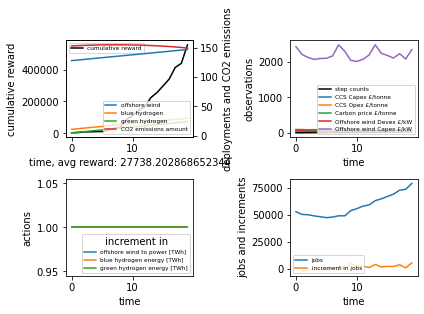

In [7]:
env.plot()